/var/folders/g8/yps0rh8j1jx46plg0qzw9hwr0000gn/T/ipykernel_79200/2457050866.py:54: UserWarning: Glyph 45576 (\N{HANGUL SYLLABLE NUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g8/yps0rh8j1jx46plg0qzw9hwr0000gn/T/ipykernel_79200/2457050866.py:54: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kjw/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45576 (\N{HANGUL SYLLABLE NUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kjw/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


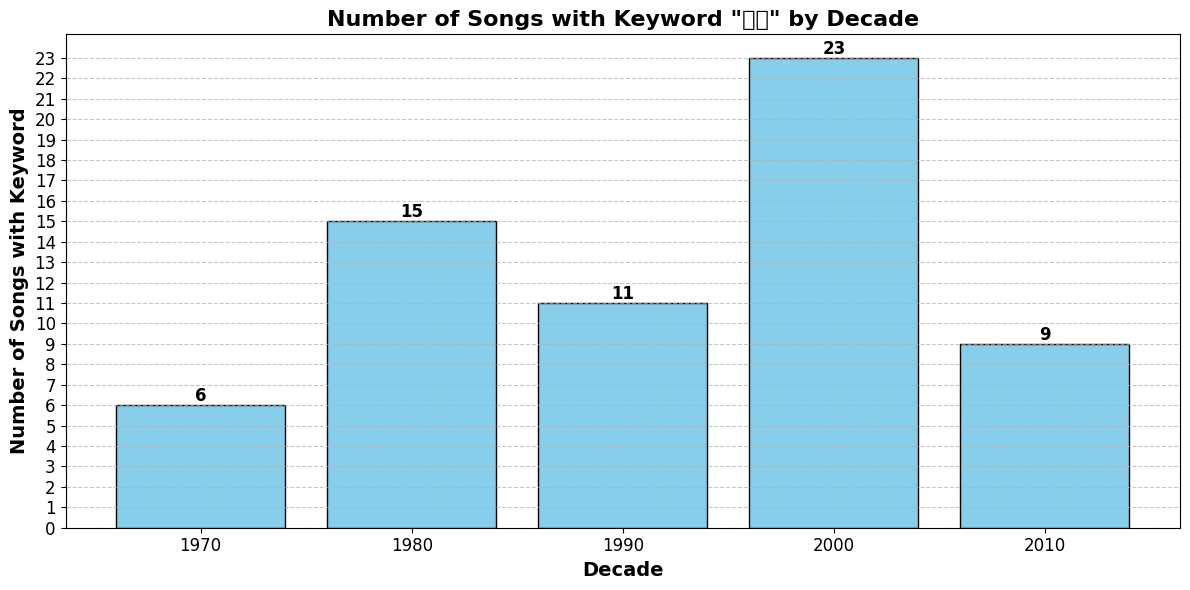

In [13]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# 키워드와 텍스트 파일들이 저장된 디렉토리를 설정합니다.

keyword = "눈물"                    # !!!!!!이부분 수정해야함!!!!!!! tkinter에서 입력받도록 
data_directory = "./decade_lyrics"

# 각 년대별로 키워드가 사용된 곡 수를 저장할 딕셔너리
decade_keyword_count = defaultdict(int)

# 텍스트 파일들을 읽어들이고 키워드가 포함된 곡을 세기
for filename in os.listdir(data_directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(data_directory, filename)
        
        # 파일 이름에서 년도를 추출
        year = int(re.search(r'\d{4}', filename).group())
        decade = (year // 10) * 10
        
        with open(filepath, 'r', encoding='utf-8') as file:
            lyrics = file.read()
            
            # 'Title'을 기준으로 곡을 나누기
            songs = lyrics.split("Title")
            
            for song in songs:
                if keyword in song:
                    decade_keyword_count[decade] += 1

# 결과를 시각화
decades = sorted(decade_keyword_count.keys())
counts = [decade_keyword_count[decade] for decade in decades]

# 그래프 설정
plt.figure(figsize=(12, 6))
bars = plt.bar(decades, counts, width=8, align='center', color='skyblue', edgecolor='black')

# 제목 및 라벨 설정
plt.xlabel('Decade', fontsize=14, fontweight='bold')
plt.ylabel('Number of Songs with Keyword', fontsize=14, fontweight='bold')
plt.title(f'Number of Songs with Keyword "{keyword}" by Decade', fontsize=16, fontweight='bold')
plt.xticks(decades, fontsize=12)
plt.yticks(range(0, max(counts) + 1, 1), fontsize=12)

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 그리드 및 스타일 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 보여주기
plt.show()